In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

# HCI lecture, survey data analysis

First we will load up our python packages. I'll just import a typical scientific data analysis stack:

- pandas: data analysis package
- numpy: numerical computation, it's a dependency of pandas but sometimes useful to have separately imported
- seaborn: a high-level plotting package
- matplotlib: a low-level plotting package, again a dependency of seaborn, but need to have the pyplot subpack available for reasons I can't quite remember.
- scipy.stats: has statistic tests

let's load in some data

In [5]:
# 1. load up the data
survey_data = pd.read_csv('hci_survey_data.csv')
survey_data.head()

,interactive_activities_likert,attend_in_person_likert,watch_online_likert,degree_program,time_in_canberra
0,5,2,2,undergraduate,1-3 years
1,3,5,1,postgraduate,3+ years
2,4,5,1,postgraduate,<1 year
3,5,2,4,undergraduate,<1 year
4,4,3,1,undergraduate,<1 year


In [7]:
survey_data.describe()

,interactive_activities_likert,attend_in_person_likert,watch_online_likert
count,75.000000,75.000000,75.000000
mean,3.360000,3.146667,2.840000
std,1.301143,1.237842,1.385641
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


In [8]:
# 2. investigate the dataset
print(survey_data.describe())
print('\n')

print("Value Counts by Category:")
print(survey_data['degree_program'].value_counts())
print(survey_data['time_in_canberra'].value_counts())

       interactive_activities_likert  attend_in_person_likert  \
count                      75.000000                75.000000   
mean                        3.360000                 3.146667   
std                         1.301143                 1.237842   
min                         1.000000                 1.000000   
25%                         2.000000                 2.000000   
50%                         3.000000                 3.000000   
75%                         4.000000                 4.000000   
max                         5.000000                 5.000000   

       watch_online_likert  
count            75.000000  
mean              2.840000  
std               1.385641  
min               1.000000  
25%               2.000000  
50%               3.000000  
75%               4.000000  
max               5.000000  


Value Counts by Category:
degree_program
undergraduate    48
postgraduate     27
Name: count, dtype: int64
time_in_canberra
<1 year      33
1-3 years  

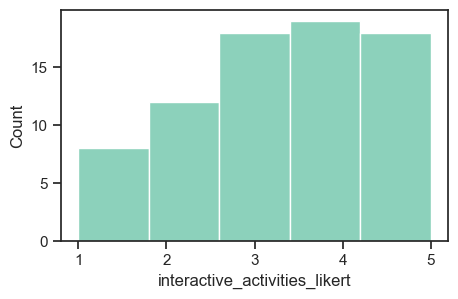

In [14]:
sns.set_theme(style="ticks", palette="Set2")
plt.figure(figsize=(5, 3))
sns.histplot(data=survey_data, x='interactive_activities_likert', bins=5)
plt.savefig('plots/fake_data_histogram.png', bbox_inches='tight', dpi=300)
plt.show()

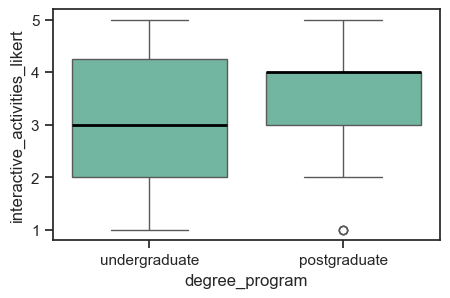

In [18]:
sns.set_theme(style="ticks", palette="Set2")
plt.figure(figsize=(5, 3))
sns.boxplot(data=survey_data, x='degree_program', y='interactive_activities_likert', medianprops={'linewidth': 2, 'color': 'black'})
plt.savefig('plots/fake_data_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

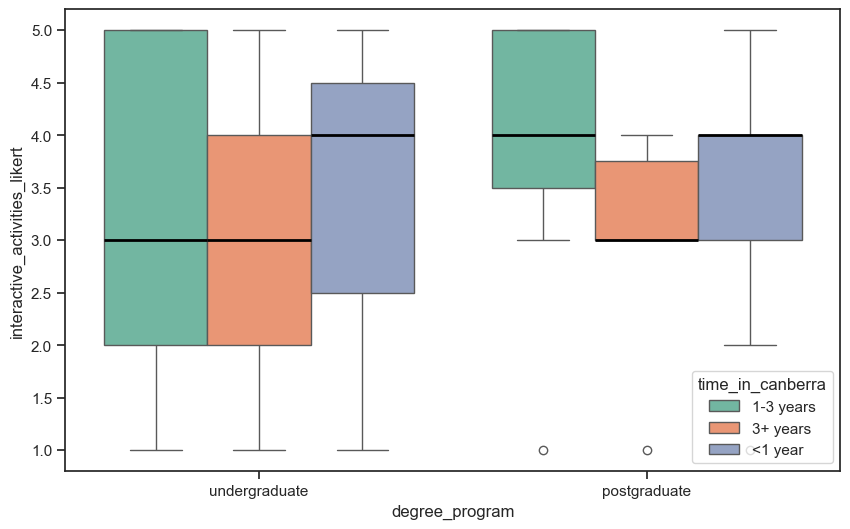

In [ ]:
# more complex plots
sns.set_theme(style="ticks", palette="Set2")
plt.figure(figsize=(10, 6))
sns.boxplot(data=survey_data, x='degree_program', y='interactive_activities_likert', hue='time_in_canberra', medianprops={'linewidth': 2, 'color': 'black'})
plt.savefig('plots/fake_data_complex_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# 4. run some statistical tests

# is there a difference in interactive activities by degree program?

undergrad_interactive = survey_data[survey_data['degree_program'] == 'undergraduate']['interactive_activities_likert']
postgrad_interactive = survey_data[survey_data['degree_program'] == 'postgraduate']['interactive_activities_likert']

t_stat, p_value = stats.ttest_ind(undergrad_interactive, postgrad_interactive)
print(f"\nT-test: Interactive Activities by Degree Program")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# statistic, p_val = stats.chi2_contingency(pd.crosstab(survey_data['degree_program'], survey_data['time_in_canberra']))[:2]
# print(f"\nChi-square test: Degree Program vs Time in Canberra")
# print(f"Chi-square statistic: {statistic:.4f}")
# print(f"P-value: {p_val:.4f}")
# print(f"\nCrosstab:")
# print(pd.crosstab(survey_data['degree_program'], survey_data['time_in_canberra']))


T-test: Interactive Activities by Degree Program
T-statistic: -0.7893
P-value: 0.4325

Chi-square test: Degree Program vs Time in Canberra
Chi-square statistic: 1.0615
P-value: 0.5882

Crosstab:
time_in_canberra  1-3 years  3+ years  <1 year
degree_program                                
postgraduate              7         6       14
undergraduate            16        13       19


In [22]:
# put this into long format for easier plotting and analysis
likert_columns = ['interactive_activities_likert', 'attend_in_person_likert', 'watch_online_likert']
metadata_columns = ['degree_program', 'time_in_canberra']
survey_long = pd.melt(survey_data, 
                     id_vars=metadata_columns,
                     value_vars=likert_columns,
                     var_name='question',
                     value_name='likert_score')

survey_long['question'] = survey_long['question'].str.replace('_likert', '')
survey_long['question'] = survey_long['question'].str.replace('_', ' ').str.title()
survey_long.head()

,degree_program,time_in_canberra,question,likert_score
0,undergraduate,1-3 years,Interactive Activities,5
1,postgraduate,3+ years,Interactive Activities,3
2,postgraduate,<1 year,Interactive Activities,4
3,undergraduate,<1 year,Interactive Activities,5
4,undergraduate,<1 year,Interactive Activities,4


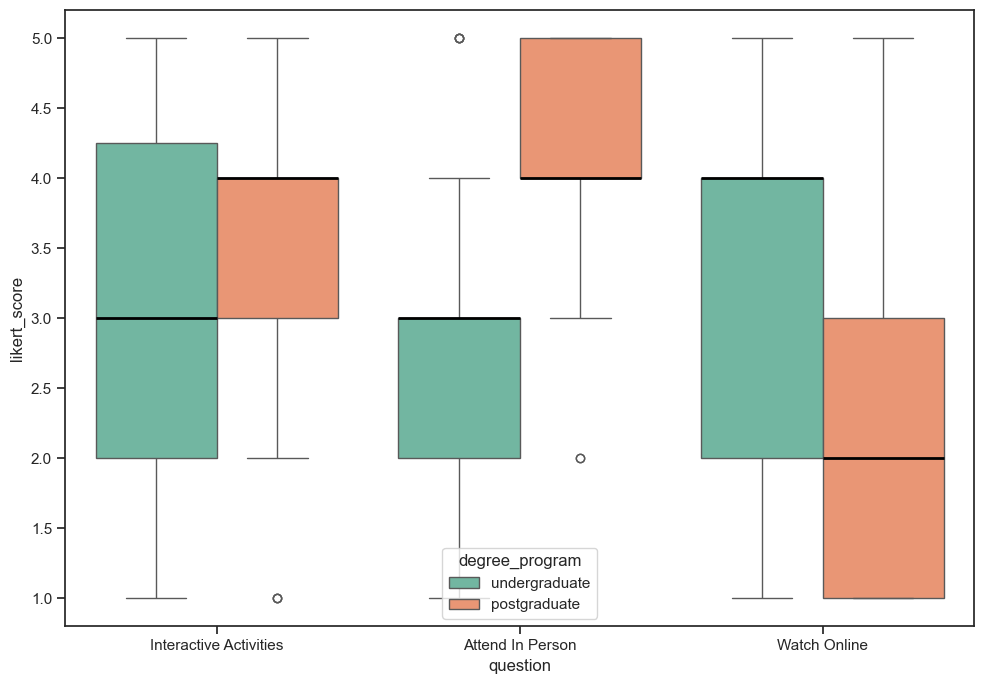

In [45]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=survey_long, x='question', y='likert_score', hue='degree_program', medianprops={'linewidth': 2, 'color': 'black'})
plt.tight_layout()
plt.savefig('plots/fake_data_all_questions.png', bbox_inches='tight', dpi=300)
plt.show()

/Users/charles/Library/Caches/pypoetry/virtualenvs/thirty-nine-hundred-hci-ODEVS6EV-py3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#66c2a5'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/charles/Library/Caches/pypoetry/virtualenvs/thirty-nine-hundred-hci-ODEVS6EV-py3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#66c2a5'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/charles/Library/Caches/pypoetry/virtualenvs/thirty-nine-hundred-hci-ODEVS6EV-py3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#66c2a5'` for the same effect.

  func(*plot_args, **plot_kwargs)


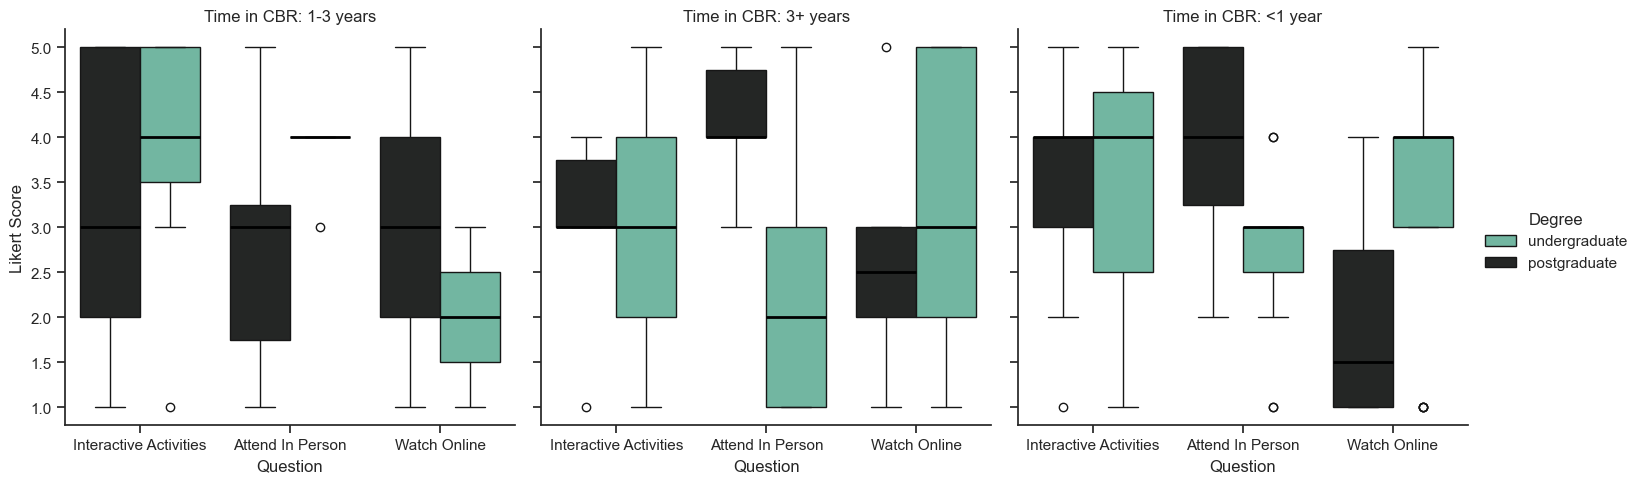

In [46]:
g = sns.FacetGrid(survey_long, col='time_in_canberra', height=5, aspect=1)
g.map_dataframe(sns.boxplot, x='question', y='likert_score', hue='degree_program', 
                medianprops={'linewidth': 2, 'color': 'black'})
g.add_legend(title='Degree')
g.set_axis_labels('Question', 'Likert Score')
g.set_titles('Time in CBR: {col_name}')
plt.savefig('plots/fake_data_all_questions_facets_1.png', bbox_inches='tight', dpi=300)
plt.show()

/Users/charles/Library/Caches/pypoetry/virtualenvs/thirty-nine-hundred-hci-ODEVS6EV-py3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#66c2a5'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/charles/Library/Caches/pypoetry/virtualenvs/thirty-nine-hundred-hci-ODEVS6EV-py3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#66c2a5'` for the same effect.

  func(*plot_args, **plot_kwargs)


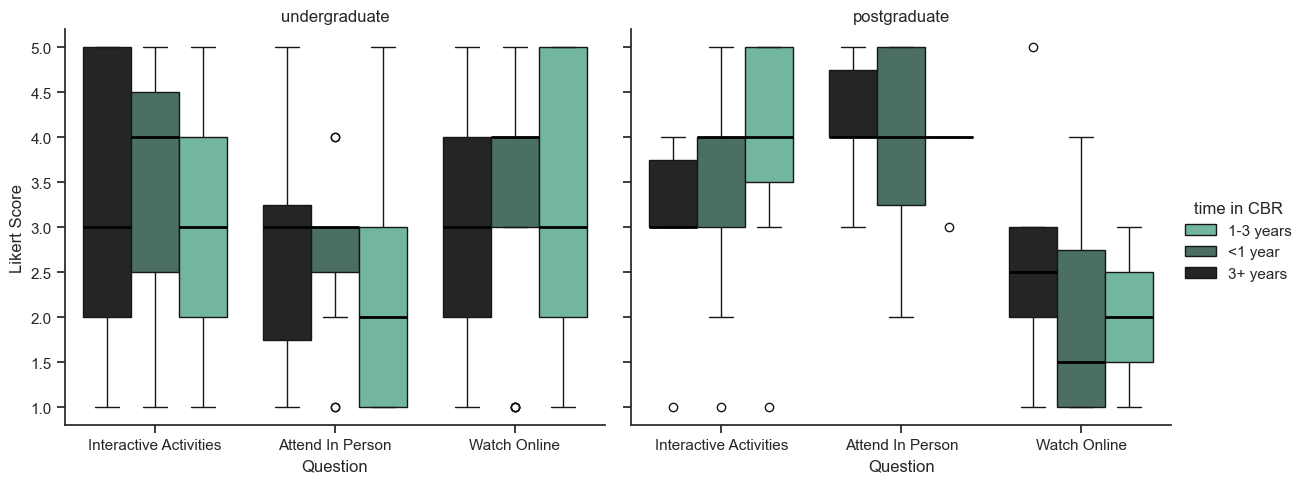

In [47]:
g = sns.FacetGrid(survey_long, col='degree_program', height=5, aspect=1.2)
g.map_dataframe(sns.boxplot, x='question', y='likert_score', hue='time_in_canberra', 
                medianprops={'linewidth': 2, 'color': 'black'})

# Customize the plot
g.add_legend(title='time in CBR')
g.set_axis_labels('Question', 'Likert Score')
g.set_titles('{col_name}')
plt.savefig('plots/fake_data_all_questions_facets_2.png', bbox_inches='tight', dpi=300)
plt.show()